In [1]:
import sys
import project1
sys.path.append('code')  # go up one folder, then into code
import registration_util as util
import registration as reg
import matplotlib.pyplot as plt

import numpy as np

0.12726671209454418


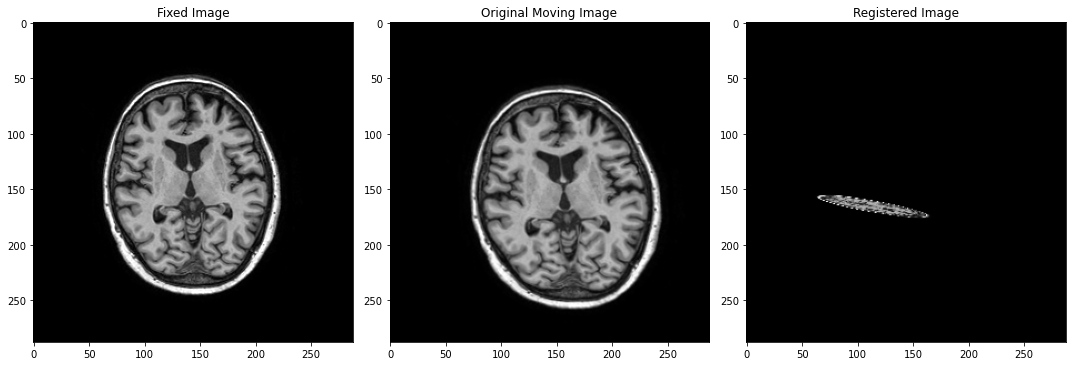

In [2]:


X_fixed= 'image_data/3_2_t1.tif'
X_move= 'image_data/3_2_t1_d.tif'

X, Xm = util.cpselect(X_fixed, X_move)

Xh = util.c2h(X)
Xmh = util.c2h(Xm)

# Step 2: Compute the affine transformation matrix
A = reg.ls_affine(Xh, Xmh)

I_fixed = plt.imread(X_fixed)
I_move = plt.imread(X_move)

# Step 5: Apply the affine transformation
I_registered, Xt = reg.image_transform(I_move, A, output_shape=None)

# Step 6: Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Fixed Image")
plt.imshow(I_fixed, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Original Moving Image")
plt.imshow(I_move, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Registered Image")
plt.imshow(I_registered, cmap='gray')

print(reg.correlation(I_fixed, I_registered))

plt.tight_layout()
plt.show()


# Task 2

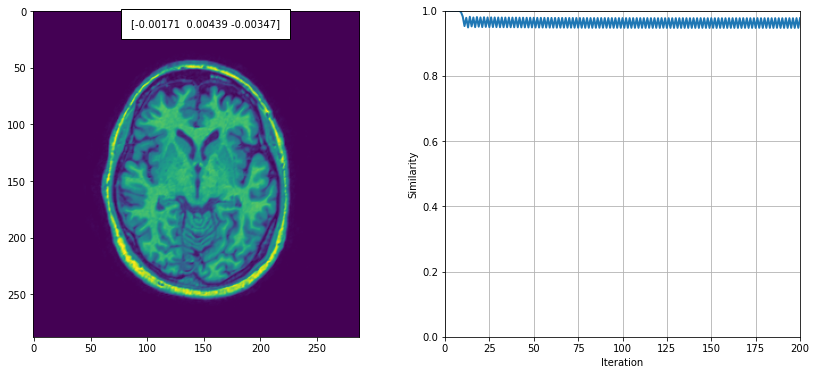

In [3]:
#Rigid intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using normalized 
#cross-correlation as a similarity measure.

s1 = "1_1_t1"
s2 = "1_1_t1_d"

project1.intensity_based_registration_rigid(s1, s2);

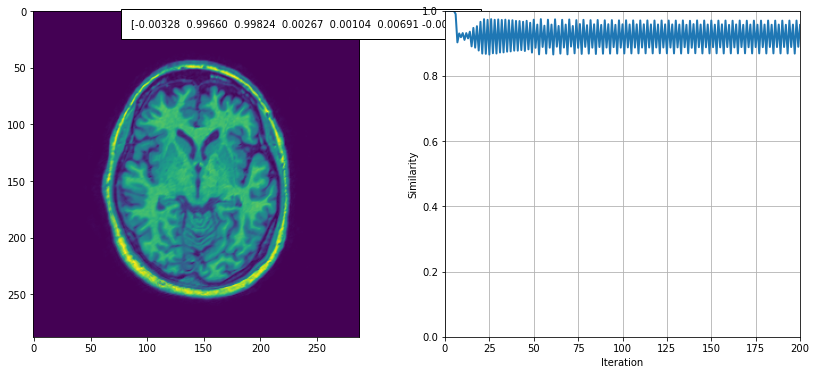

Line2D(_line0)


In [4]:
#Affine intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using normalized 
#cross-correlation as a similarity measure.

project1.intensity_based_registration_affine("1_1_t1", "1_1_t1_d")

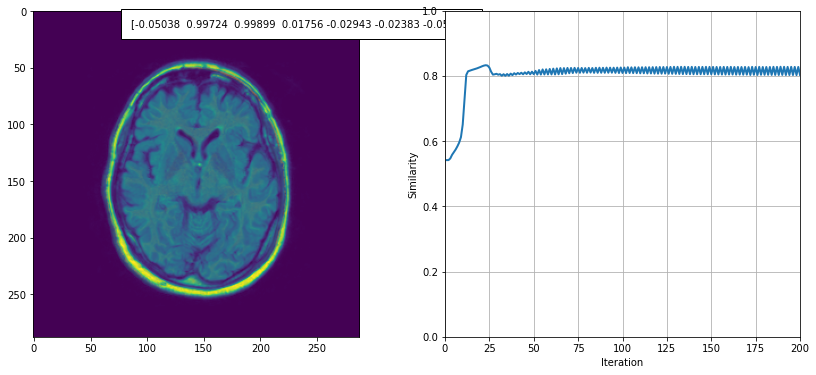

In [5]:
#Affine intensity-based registration of a T1 and a T2 slice 
#(e.g. 1_1_t1.tif and 1_1_t2.tif) using normalized 
#cross-correlation as a similarity measure.

project1.intensity_based_registration_affine("1_1_t1", "1_1_t2")

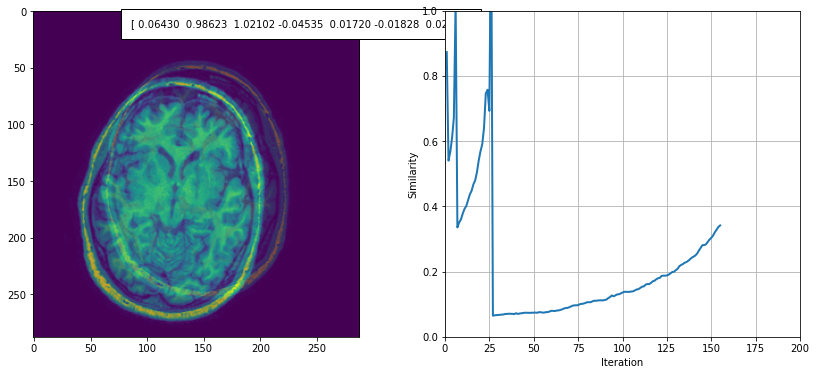

KeyboardInterrupt: 

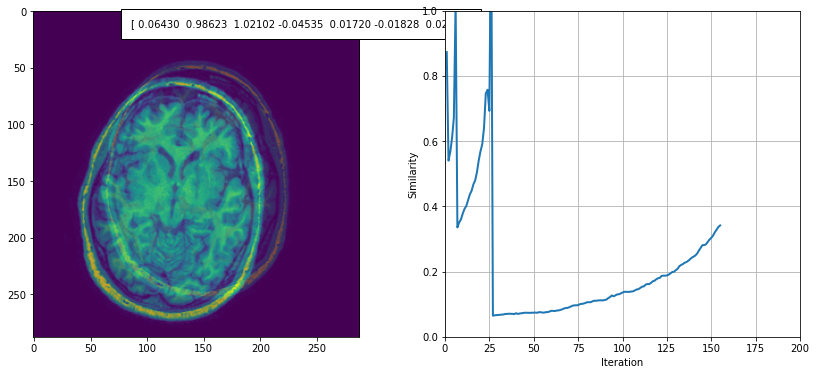

In [5]:
#Affine intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using mutual information 
#as a similarity measure.

project1.intensity_based_registration_affine_mi("1_1_t1", "1_1_t1_d")

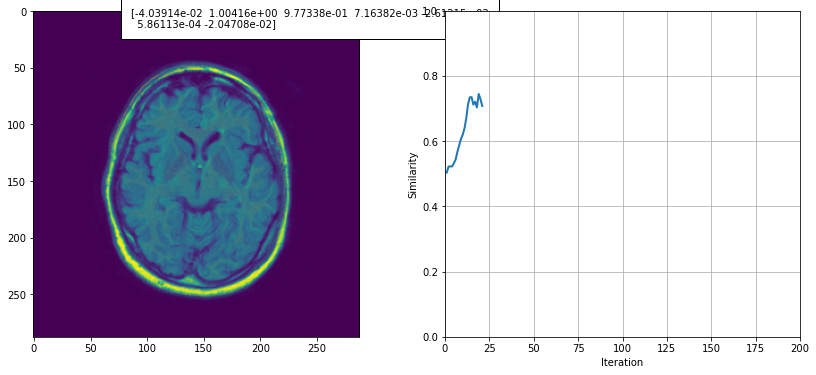

KeyboardInterrupt: 

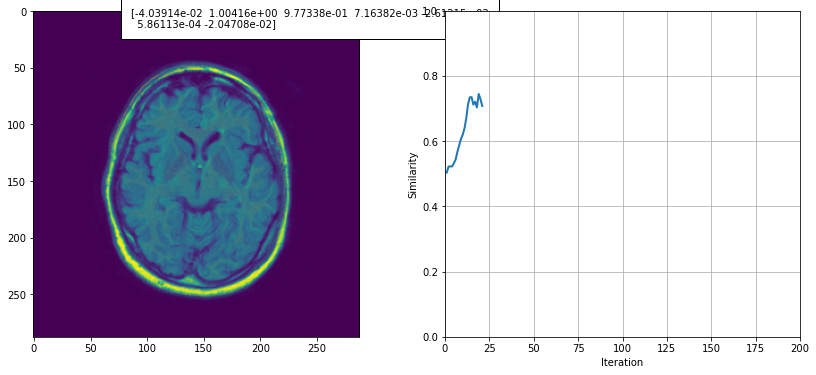

In [ ]:
#Affine intensity-based registration of a T1 slice and a T2 slice 
#(e.g. 1_1_t1.tif and 1_1_t2.tif) using mutual information as a 
#similarity measure.

project1.intensity_based_registration_affine_mi("1_1_t1", "1_1_t2")

# Open ended project work

Research question: 

What is the impact of Gaussian noise on an MR image on the similarity measure using normalized cross-correlation?


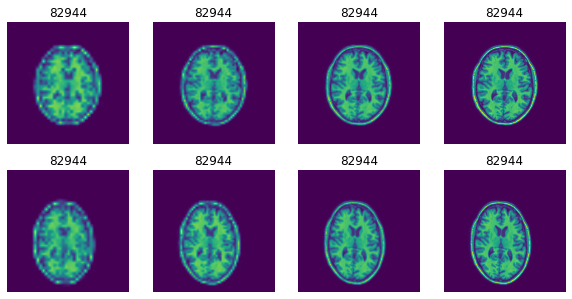

In [32]:

tIm = plt.imread('image_data/2_2_t1.tif')
rIm = plt.imread('image_data/2_2_t1_d.tif')

num_images = 4
stack_original = project1.downsampler(num_images, 2.2, tIm)
stack_rotated = project1.downsampler(num_images, 2.2, rIm)

num_images = len(stack_original)

# Create a figure with a row of subplots
fig, axs = plt.subplots(2, num_images, figsize=((5 * num_images)/2, 5))

for i, img in enumerate(stack_original):
    axs[0,i].imshow(img)
    axs[0,i].set_title(img.size)

    axs[1,i].imshow(stack_rotated[i])
    axs[1,i].set_title(stack_rotated[i].size)
    axs[0,i].axis('off')  # Hide axes
    axs[1,i].axis('off')  # Hide axes

plt.show()

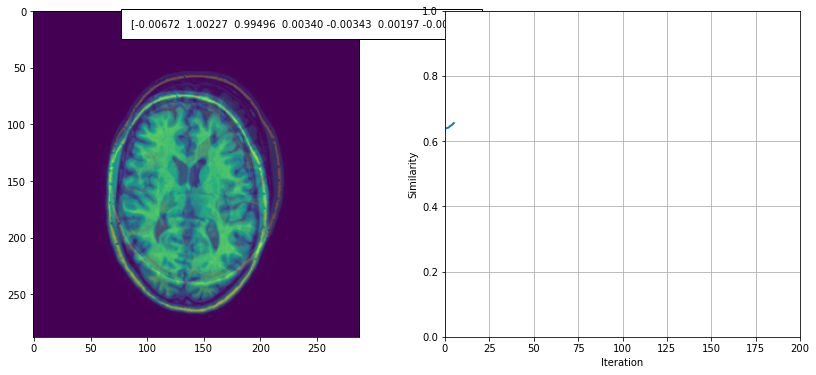

In [ ]:
learning_curve_norm = project1.intensity_based_registration_affine("2_2_t1", "2_2_t1_d")
xdata_norm = learning_curve_norm.get_xdata()
ydata_norm = learning_curve_norm.get_ydata()

KeyboardInterrupt: 

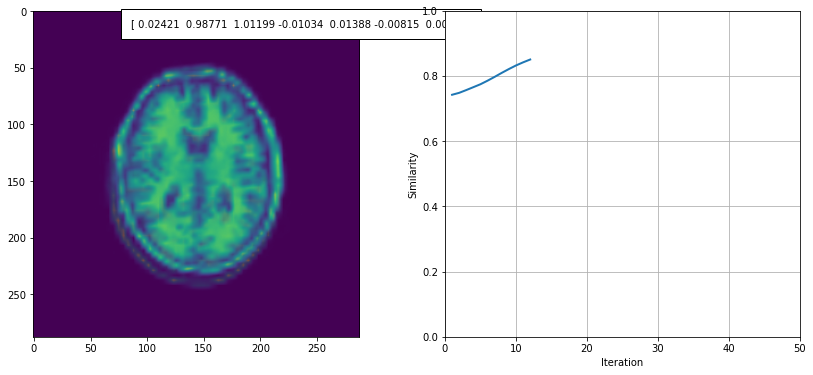

In [31]:

ydata_th = []
iterations = [50,50,50,50]
for i in range(0, num_images):
    Th, learning_curve_th = project1.intensity_based_registration_affine_th(stack_original[i], stack_rotated[i], iterations[i])
    if i < (num_images - 1):
        if i == 0:
            Th_acc = Th
        else: 
            Th_acc = np.dot(Th, Th_acc)
        stack_rotated[i+1], Xt1 = reg.image_transform(stack_rotated[i+1],Th_acc) 


ydata_th = learning_curve_th.get_ydata()
xdata_th = range(sum(iterations)-iterations[-1],sum(iterations))

plt.plot(xdata_th, ydata_th, color='blue', label='Line 1')
plt.plot(xdata_norm, ydata_norm, color='red', label='Line 2')
plt.show()



#display best final image overlaid on the original
transformed = reg.image_transform(stack_rotated[-1], Th) 

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(transformed[0], alpha=1)  
ax.imshow(stack_original[-1], alpha=0.5)

plt.axis('off')  
plt.show()


In [43]:
print(max(ydata_norm))
print(max(ydata_th))
print(sum(ydata_norm)/len(ydata_norm))
print(sum(ydata_th)/len(ydata_th))



[0.87071703]
[0.86255498]
[0.79596471]
[0.82751899]
